In [13]:
import xarray as xr
import numpy as np
import pandas as pd



1.   Load in .nc file into dataarray
2.   Convert dataarray data to numpy array
3.   Fill missing with 0
4.   Append to benchmark_intial csv and save



1793242
0
-10.21835
18114.146
631.9217
1496.6443


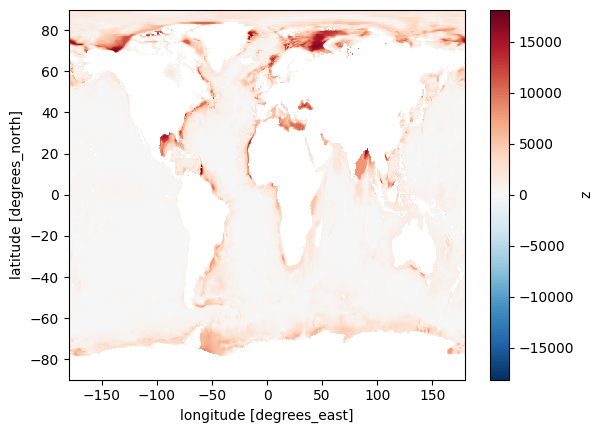

In [14]:
filepath = '/content/GL_TOT_SED_THICK_M_GLOBSED_Straume.5m_EASE9262.68m.nc'
ds = xr.open_dataset(filepath)

ds['z'].plot()

ds_data = np.asarray(ds['z'].values)

ds_filled_data = np.nan_to_num(ds_data, nan=0)

#diagnostic of missing values numpy array
print(np.isnan(ds_data).sum())
print(np.isnan(ds_filled_data).sum())

#diagnostic of numpy array statistics
print(ds_filled_data.min())
print(ds_filled_data.max())
print(ds_filled_data.mean())
print(ds_filled_data.std())

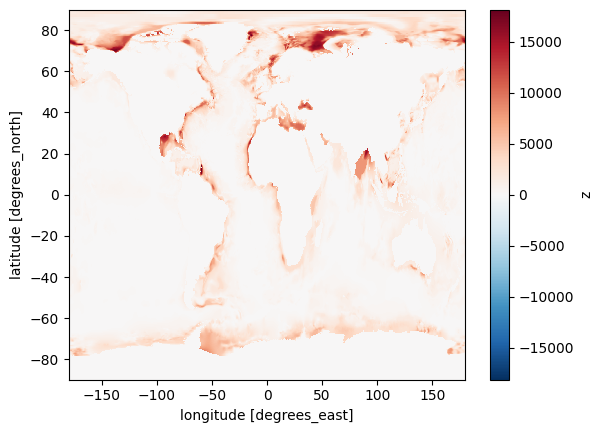

In [15]:
# Get the dimensions of the 'z' variable
dims = ds['z'].dims

# Assign the filled data to the 'z' variable, specifying the dimensions
ds['z'] = (dims, ds_filled_data)

ds['z'].plot()


In [17]:
ds.to_netcdf('sed_thick_filled.nc')